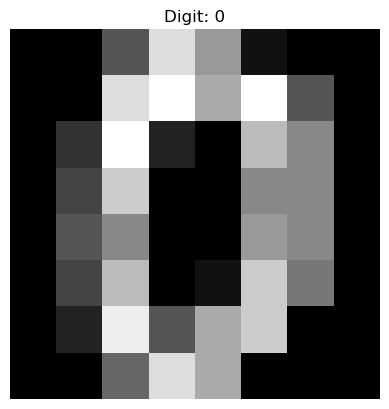

Explained variance by 2 components: [0.12033916 0.09561054]


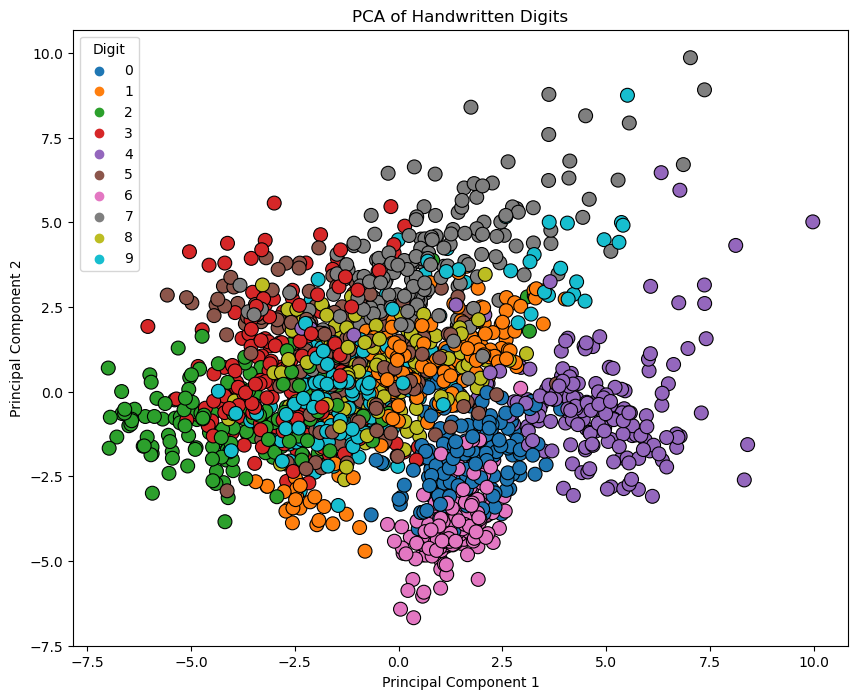

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import seaborn as sns

# Loading the digits dataset
digits = load_digits()
# Creating a DataFrame from the digits data
df = pd.DataFrame(digits.data)

# Dropping the target variable 'target' (the digit labels)
pixels = df.copy()

# Grab the first row from the pixels DataFrame
single_image = pixels.iloc[0]

# Convert the Series to a numpy array
image_array = single_image.to_numpy()

# Reshape the numpy array into an 8x8 array
image_reshaped = image_array.reshape(8, 8)

# Plotting the image using Matplotlib
plt.imshow(image_reshaped, cmap='gray')
plt.title(f"Digit: {digits.target[0]}")
plt.axis('off')  # Hide the axes
plt.show()

# Standardizing the pixel data using StandardScaler
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(pixels)

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_pixels)

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by 2 components: {explained_variance}")

# Create a scatterplot using Seaborn
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Digit'] = digits.target

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Digit', data=pca_df, palette='tab10', s=100, edgecolor='black')
plt.title("PCA of Handwritten Digits")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Digit")
plt.show()
